Saving customer_behavior.csv to customer_behavior (2).csv
📄 Columns in dataset: ['total_spent', 'avg_purchase_value', 'visits_per_month', 'buyer_type']

🔍 First 5 rows:
    total_spent  avg_purchase_value  visits_per_month      buyer_type
0  4007.982067          235.560678                 3  bargain_hunter
1  3117.968387          313.883912                13  bargain_hunter
2  4232.062646          122.280804                15  bargain_hunter
3   577.820196          470.747406                20   premium_buyer
4  2839.005107           23.207422                19  bargain_hunter


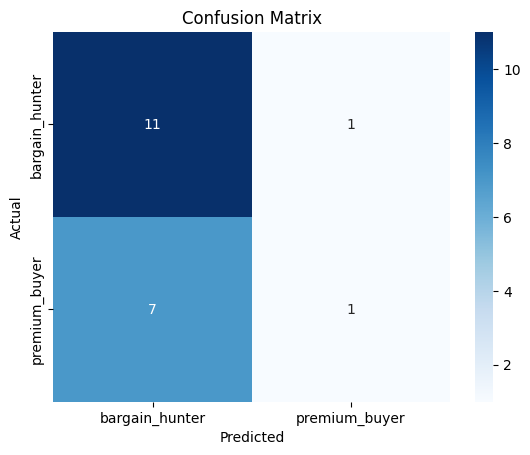

✅ Accuracy: 0.6
✅ Precision: 0.5
✅ Recall: 0.125

📋 Classification Report:
                 precision    recall  f1-score   support

bargain_hunter       0.61      0.92      0.73        12
 premium_buyer       0.50      0.12      0.20         8

      accuracy                           0.60        20
     macro avg       0.56      0.52      0.47        20
  weighted avg       0.57      0.60      0.52        20



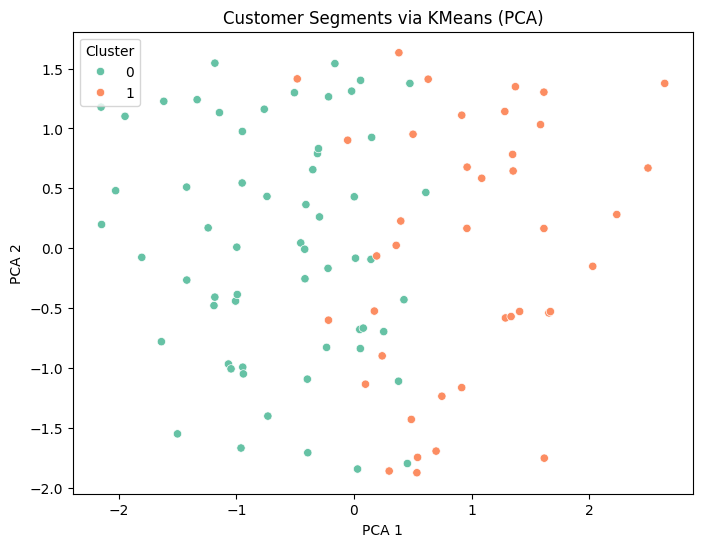

In [10]:
# =======================
# 1. Import Libraries
# =======================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# =======================
# 2. Upload CSV File in Colab
# =======================
from google.colab import files
uploaded = files.upload()

# Load CSV
df = pd.read_csv(next(iter(uploaded)))

# =======================
# 3. Show Data Summary
# =======================
print("📄 Columns in dataset:", df.columns.tolist())
print("\n🔍 First 5 rows:\n", df.head())

# =======================
# 4. Label Encode the Target
# =======================
target_column = 'buyer_type'  # Target: bargain_hunter / premium_buyer
label_encoders = {}

# Encode all object (string) columns except the target
for col in df.select_dtypes(include='object').columns:
    if col != target_column:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target separately
target_le = LabelEncoder()
df[target_column] = target_le.fit_transform(df[target_column])

# =======================
# 5. Prepare Features & Labels
# =======================
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =======================
# 6. Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =======================
# 7. Train Classifier
# =======================
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# =======================
# 8. Evaluation
# =======================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred, average='binary'))
print("✅ Recall:", recall_score(y_test, y_pred, average='binary'))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=target_le.classes_))

# =======================
# 9. KMeans Clustering
# =======================
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

# Dimensionality reduction for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=cluster_labels, palette='Set2')
plt.title('Customer Segments via KMeans (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()
